In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('US_Accidents_June20.csv',index_col='ID',parse_dates=['Start_Time','End_Time'])

In [4]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Day'] = df['Start_Time'].dt.day
df['Impact'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60
df["YMD"] = df["Start_Time"].dt.date

In [5]:
# clean the data based on the condition that the impact on traffic is between zero-one week,and drop duplicates
one_week = 60*24*7
df_clean = df[(df['Impact']>0) & (df['Impact']< one_week)].drop_duplicates(subset=['Start_Time',
                                                                                   'End_Time',
                                                                                   'City',
                                                                                  'Street',
                                                                                   'Number',
                                                                                   'Description'])

In [6]:
#summary the dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3490739 entries, A-1 to A-3513780
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Source                 object        
 1   TMC                    float64       
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Number                 float64       
 12  Street                 object        
 13  Side                   object        
 14  City                   object        
 15  County                 object        
 16  State                  object        
 17  Zipcode                object        
 18  Country                

In [7]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
TMC,2477234.0,208.016946,20.739378,200.000000,201.000000,201.000000,201.000000,4.060000e+02
Severity,3490739.0,2.339882,0.550251,1.000000,2.000000,2.000000,3.000000,4.000000e+00
Start_Lat,3490739.0,36.535322,4.883722,24.555269,33.631897,35.901772,40.308561,4.900220e+01
Start_Lng,3490739.0,-95.833215,17.364979,-124.623833,-117.456688,-91.063080,-80.946304,-6.711317e+01
End_Lat,1013505.0,37.555453,4.864539,24.570110,33.991916,37.785340,41.062050,4.907500e+01
End_Lng,1013505.0,-100.691880,18.490421,-124.497829,-118.368250,-97.320550,-82.394190,-6.710924e+01
Distance(mi),3490739.0,0.281038,1.550486,0.000000,0.000000,0.000000,0.010000,3.336300e+02
Number,1240992.0,5973.926153,14989.952716,0.000000,864.000000,2798.000000,7099.000000,9.999997e+06
Temperature(F),3425469.0,61.928479,18.630417,-89.000000,50.000000,64.000000,75.900000,1.706000e+02
Wind_Chill(F),1630178.0,53.508925,23.800339,-89.000000,35.500000,57.000000,72.000000,1.150000e+02


In [8]:
df1 = df_clean[['Country',
                'Start_Time',
                'End_Time',
                'Year',
                'Month',
                'Weekday',
                'Hour',
                'Impact',
                'Severity']]

In [9]:
print(df1.groupby('Hour')['Severity'].mean())

Hour
0     2.576453
1     2.532420
2     2.554447
3     2.579331
4     2.409857
5     2.379041
6     2.328626
7     2.281779
8     2.273143
9     2.310032
10    2.304002
11    2.301624
12    2.334750
13    2.343566
14    2.345758
15    2.342134
16    2.335936
17    2.337662
18    2.351610
19    2.368406
20    2.404331
21    2.438465
22    2.461724
23    2.516047
Name: Severity, dtype: float64


In [10]:
print(df1.groupby('Weekday')['Severity'].mean())

Weekday
0    2.316045
1    2.314460
2    2.314407
3    2.319499
4    2.326130
5    2.504056
6    2.510962
Name: Severity, dtype: float64


In [11]:
print(df1.groupby('Month')['Severity'].mean())

Month
1     2.338568
2     2.332508
3     2.331925
4     2.322071
5     2.334663
6     2.356062
7     2.388572
8     2.357203
9     2.335101
10    2.318753
11    2.339566
12    2.336936
Name: Severity, dtype: float64


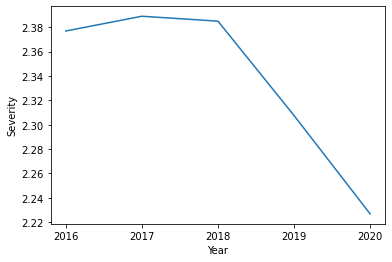

In [12]:
df1.groupby('Year')['Severity'].mean().plot(kind='line')
plt.xticks([2016,2017,2018,2019,2020])
plt.ylabel('Severity')
plt.show()

# the accidents severity declined since 2017, we can assume that people have better security awareness
# the improve of infrastructure and traffic education also contribute to the decrease
# we have strong reason to predict the traffic severity will continue to drop

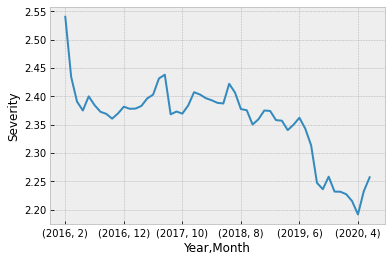

In [36]:
df1.groupby(by=['Year','Month'])['Severity'].mean().plot(kind='line')
plt.ylabel('Severity')
#plt.xlim((1,12))
plt.show()
# from this plot, the severity declined from 2.55 to 2.4 in 2016, and keeped around 2.4 from 2016-2018.8
# then it declined around to 2.35, from 2019.6 is another huge declined from 2019.6-2020.4

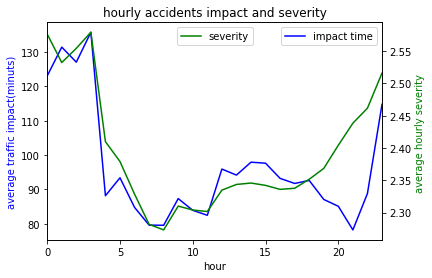

In [15]:
impact_h = df1.groupby('Hour')['Impact'].mean()
severity_h = df1.groupby('Hour')['Severity'].mean()
fig,ax=plt.subplots()
ax.plot(impact_h,color='blue',label='impact time')
ax.set_xlabel('hour')
ax.set_ylabel('average traffic impact(minuts)',color='blue')
ax.legend(loc='upper right')

ax2 = ax.twinx()
ax2.plot(severity_h,color='green',label='severity')
ax2.set_ylabel('average hourly severity ',color='green')
ax2.set_label('severity')
ax.set_title('hourly accidents impact and severity')
ax2.legend(loc='upper center')
plt.style.use('bmh')
plt.xlim((0,23))
plt.show()
# the basic trend of severity and impact time on traffic overlap,
# night-time severity and impact is severe than daytime

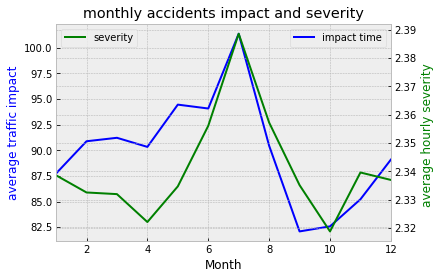

In [16]:
impact_h = df1.groupby('Month')['Impact'].mean()
severity_h = df1.groupby('Month')['Severity'].mean()
fig,ax=plt.subplots()
ax.plot(impact_h,color='blue',label='impact time')
ax.set_xlabel('Month')
ax.set_ylabel('average traffic impact',color='blue')
ax.legend(loc='upper right')

ax2 = ax.twinx()
ax2.plot(severity_h,color='green',label='severity')
ax2.set_ylabel('average hourly severity ',color='green')
ax2.set_label('severity')
ax.set_title('monthly accidents impact and severity')
ax2.legend(loc='upper left')
plt.style.use('bmh')
plt.xlim((1,12))
plt.show()
# the basic trend of severity and impact time on traffic overlap,
# 4-7 months severity and impact is severe than 8-3 months

ValueError: setting an array element with a sequence.

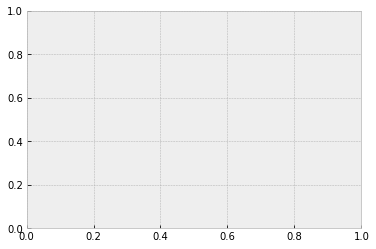

In [41]:
size_h = df1.groupby(by=['Year','Month'])['Severity'].count()
severity_h = df1.groupby(by=['Year','Month'])['Severity'].mean()
fig,ax=plt.subplots()
ax.plot(size_h,color='blue',label='cases')
ax.set_xlabel('year')
ax.set_ylabel('cases',color='blue')
ax.legend(loc='upper right')

ax2 = ax.twinx()
ax2.plot(severity_h,color='green',label='severity')
ax2.set_ylabel('average hourly severity ',color='green')
ax2.set_label('severity')
ax.set_title('hourly accidents impact and severity')
ax2.legend(loc='upper center')
plt.style.use('bmh')
#plt.xlim((0,23))
plt.show()


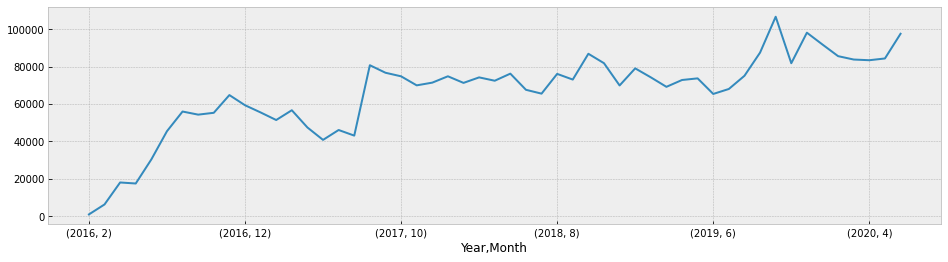

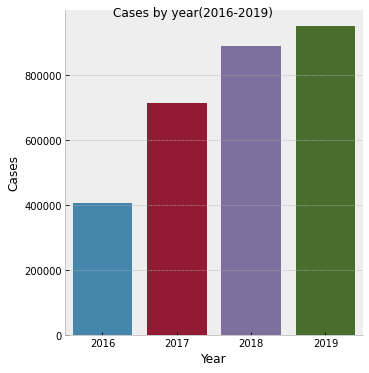

In [26]:
fig = plt.figure(figsize=(16,4))
df1.groupby(by=['Year','Month']).size().plot()

m = sns.catplot(x='Year',data=df_clean[df_clean['Year'] < 2020],kind='count')
m.fig.suptitle('Cases by year(2016-2019)')
m.set(ylabel='Cases')
plt.show()
# Looking for the accidents cases with years,
# there is a growing trend.

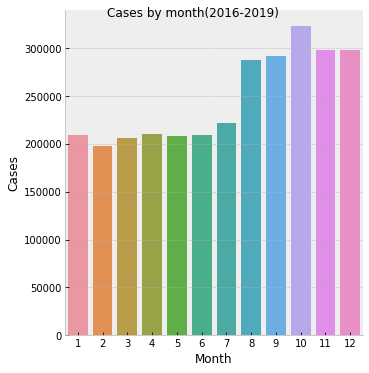

In [34]:
m1 = sns.catplot(x='Month',data=df1[df1['Year'] < 2020],kind='count')
m1.fig.suptitle('Cases by month(2016-2019)')
m1.set(ylabel='Cases')
plt.show()
# Looking for the accidents cases with months,
# Cases number is higher during 8-12 month,
# lower during 1-7 month
# the highest month is Oct.
# We can compare to other variables to see what makes
# 8-12 higher, and Oct. highest.


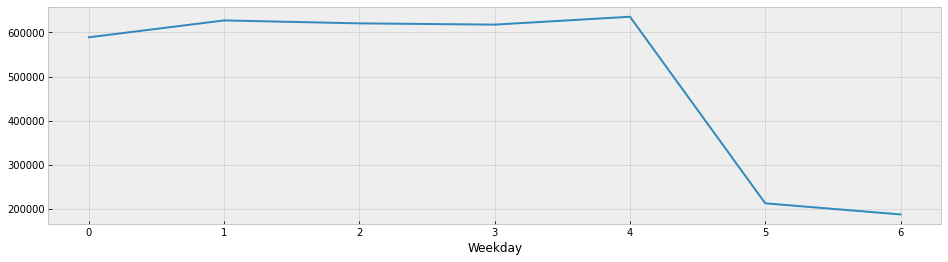

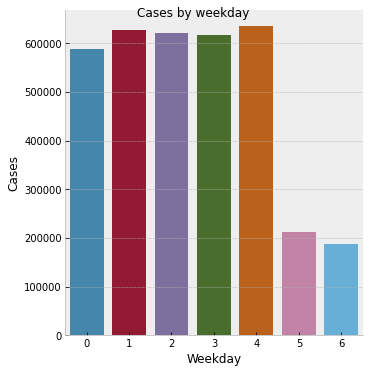

In [29]:
fig = plt.figure(figsize=(10,6))
df1.groupby(by=['Weekday']).size().plot()

m2 = sns.catplot(x='Weekday',data=df1,kind='count')
m2.fig.suptitle('Cases by weekday')
m2.set(ylabel='Cases')
plt.show()
# During the weekday, the accidents cases are higher
# than weekend, compare with case by hour plot,
# accidents have higher chance to happened when people
# go out to work


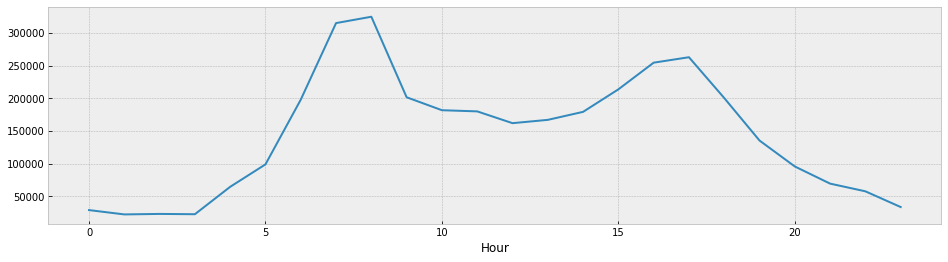

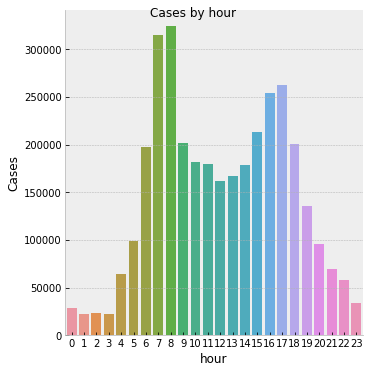

In [30]:
fig = plt.figure(figsize=(10,6))
df1.groupby(by=['Hour']).size().plot()

m3 = sns.catplot(x='Hour',data=df1,kind='count')
m3.fig.suptitle('Cases by hour')
m3.set(ylabel='Cases',xlabel='hour')
plt.show()
# We can see 2 peaks on this plot, from 7-8 and 16-17
# which is the time people on commute from home to office, or back home.
# And there is one bottom, from 23-3. Usually, most people are in sleep during this time.

2    0.675990
3    0.284803
4    0.031429
1    0.007778
Name: Severity, dtype: float64

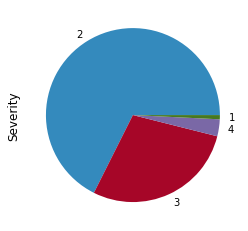

In [21]:
df1['Severity'].value_counts(normalize=True).plot(kind='pie')
df1['Severity'].value_counts(normalize=True)
# Looking for the severity, level 2 has 67%, level 3 has 28%, level 4 only has 3.1%
# level 1 only has 0.77%.



In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
df_seasonal = df1.groupby('Month')
df_seasonal.head(10)

,Country,Start_Time,End_Time,Year,Month,Weekday,Hour,Impact,Severity
ID,,,,,,,,,
A-1,US,2016-02-08 05:46:00,2016-02-08 11:00:00,2016,2,0,5,314.000000,3
A-2,US,2016-02-08 06:07:59,2016-02-08 06:37:59,2016,2,0,6,30.000000,2
A-3,US,2016-02-08 06:49:27,2016-02-08 07:19:27,2016,2,0,6,30.000000,2
A-4,US,2016-02-08 07:23:34,2016-02-08 07:53:34,2016,2,0,7,30.000000,3
A-5,US,2016-02-08 07:39:07,2016-02-08 08:09:07,2016,2,0,7,30.000000,2
...,...,...,...,...,...,...,...,...,...
A-36936,US,2016-05-02 06:36:56,2016-05-02 07:22:22,2016,5,0,6,45.433333,3
A-36937,US,2016-05-02 07:03:38,2016-05-02 08:18:38,2016,5,0,7,75.000000,3
A-36938,US,2016-05-02 07:05:00,2016-05-02 08:20:00,2016,5,0,7,75.000000,2


In [24]:
decompfreq = 12
model = 'additive'

decomposition = seasonal_decompose(
    df_seasonal.Severity,
    period = decompfreq,
    model = model
)



ValueError: setting an array element with a sequence.